# The Machine Learning Group Challenge!

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using a preprocessed version of the Lending Club loan dataset.

- Class into divided into 2 groups.

- The training data is 13689 loans labeled either as 1 (successful) or 0 (default). Comes with 30 categorical and numerical features. The testing data is also 13689 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will evaluate your model on the testing dataset. You cannot used testing data to train a model.

- Your profit will be determined by the amount of money you make from correctly predicting good loans (loan amount * interest rate/100.) subtracted by the money you lose from incorrectly predicting bad loans as good (-loan amount). I have given a function to calculate that.

- Finding the correct probability threshold will be super key in determing how much money you make.

- **VERY IMPORTANT:** You must transform your testing the data the same way you did your training data. So make sure you have the same columns in the same order.
        
- Stewart and I will be on be hand for guidance. However I want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- I recommend starting off simple by using a small number of features

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/



### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:00
    - Feature engineering/selection: make dummy variables, dropping features, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:00 - 8:45
    - Modeling time!!
    
    
- 8:45 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Winner decision. Exit tickets.

In [104]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

/Users/robertyeagle/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

/Users/robertyeagle/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

# Get the Data

In [112]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
train = pd.read_csv("../../data/lending_club/challenge_training_data2.csv")
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


In [18]:
#Load in data dictionary
data_dict = pd.read_csv("../../data/lending_club/the_data_dictionary.csv")
data_dict.head(40)

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [21]:
train.loan_status.value_counts()

1    10844
0     2845
Name: loan_status, dtype: int64

In [ ]:
groupby(df.market_final).within_20_perday.mean().sort_values().plot(kind='bar', figsize=(13,6))

# Clean the Data and Get Correct Dtypes

In [113]:
train.columns

Index([u'id', u'loan_amnt', u'funded_amnt', u'term', u'int_rate',
       u'installment', u'grade', u'emp_title', u'emp_length',
       u'home_ownership', u'annual_inc', u'verification_status',
       u'loan_status', u'desc', u'purpose', u'title', u'dti', u'delinq_2yrs',
       u'fico_range_low', u'fico_range_high', u'inq_last_6mths', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'last_credit_pull_d', u'acc_now_delinq', u'delinq_amnt', u'tax_liens'],
      dtype='object')

In [114]:
train["term"] = train.term.str.replace("months", "")
train["int_rate"] = train.int_rate.str.replace("%", "")
train["emp_length"] = train.emp_length.str.replace("years", "")
train["home_ownership"] = train.emp_length.str.replace("rent", "1")
train["home_ownership"] = train.emp_length.str.replace("own", "0")
train["verification_status"] = train.emp_length.str.replace("Not Verified", "0")
train["verification_status"] = train.emp_length.str.replace("Verified", "1")
train["verification_status"] = train.emp_length.str.replace("Source Verified", "1")

In [138]:
train.term = train.term.astype(float)

In [146]:
train.term = train.term.astype(float)
train["int_rate"] = train["int_rate"].astype(float)

In [342]:
train["emp_length"][:10]

0        9 
1        4 
2        3 
3        5 
4        4 
5    1 year
6        3 
7        6 
8        5 
9        3 
Name: emp_length, dtype: object

In [142]:
train["int_rate"]

0         10.99
1          7.51
2         12.53
3         13.49
4         13.22
5         11.99
6         11.34
7         13.99
8         12.12
9         16.32
10        13.16
11         5.42
12         7.90
13        19.29
14        10.99
15        14.09
16        14.79
17         6.17
18        19.82
19        12.98
20        10.99
21        15.58
22        21.67
23        12.99
24        14.26
25        20.25
26        13.47
27        13.06
28         7.14
29        15.37
          ...  
13659     13.23
13660     15.23
13661      7.74
13662      7.49
13663     13.61
13664     13.11
13665     16.35
13666      8.59
13667     16.45
13668     11.89
13669      7.40
13670     13.06
13671     12.69
13672     12.80
13673     11.26
13674     17.86
13675     13.99
13676     12.53
13677     13.17
13678     17.99
13679     18.17
13680     12.99
13681     12.42
13682     15.65
13683     18.64
13684     11.12
13685      7.90
13686     10.99
13687      9.63
13688      9.63
Name: int_rate, Length: 

In [115]:
train.columns

Index([u'id', u'loan_amnt', u'funded_amnt', u'term', u'int_rate',
       u'installment', u'grade', u'emp_title', u'emp_length',
       u'home_ownership', u'annual_inc', u'verification_status',
       u'loan_status', u'desc', u'purpose', u'title', u'dti', u'delinq_2yrs',
       u'fico_range_low', u'fico_range_high', u'inq_last_6mths', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'last_credit_pull_d', u'acc_now_delinq', u'delinq_amnt', u'tax_liens'],
      dtype='object')

# Look at relationship between features

In [131]:
train.corr().sort_values(by='loan_status', ascending = False).head(20)

,id,loan_amnt,funded_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens,fico_avg
loan_status,0.172884,0.013136,0.014521,0.009810,0.032233,1.000000,-0.046280,-0.035297,0.238120,0.238120,-0.371061,-0.019613,-0.080022,-0.103399,0.007716,NaN,NaN,-0.016687,0.238120
fico_range_low,0.112211,0.128810,0.120513,0.054176,0.045770,0.238120,-0.189935,-0.220971,1.000000,1.000000,-0.149492,-0.028387,-0.161982,-0.035749,0.105756,NaN,NaN,-0.016053,1.000000
fico_range_high,0.112211,0.128810,0.120513,0.054176,0.045770,0.238120,-0.189935,-0.220971,1.000000,1.000000,-0.149492,-0.028387,-0.161982,-0.035749,0.105756,NaN,NaN,-0.016053,1.000000
fico_avg,0.112211,0.128810,0.120513,0.054176,0.045770,0.238120,-0.189935,-0.220971,1.000000,1.000000,-0.149492,-0.028387,-0.161982,-0.035749,0.105756,NaN,NaN,-0.016053,1.000000
id,1.000000,0.200422,0.207619,0.110181,0.025484,0.172884,0.081509,-0.044254,0.112211,0.112211,-0.210223,0.015206,-0.032031,-0.049540,0.059740,NaN,NaN,-0.019617,0.112211
annual_inc,0.025484,0.302584,0.300004,0.310228,1.000000,0.032233,-0.121657,0.031826,0.045770,0.045770,0.026730,0.202448,-0.015188,0.339139,0.290302,NaN,NaN,-0.003662,0.045770
funded_amnt,0.207619,0.979824,1.000000,0.954544,0.300004,0.014521,0.074090,-0.037667,0.120513,0.120513,-0.053264,0.167923,-0.049016,0.253378,0.254285,NaN,NaN,-0.011076,0.120513
loan_amnt,0.200422,1.000000,0.979824,0.926593,0.302584,0.013136,0.073157,-0.034562,0.128810,0.128810,-0.053090,0.169631,-0.048453,0.254794,0.259847,NaN,NaN,-0.011027,0.128810
installment,0.110181,0.926593,0.954544,1.000000,0.310228,0.009810,0.065028,-0.025896,0.054176,0.054176,-0.029958,0.169073,-0.043203,0.275574,0.239929,NaN,NaN,-0.010941,0.054176
total_acc,0.059740,0.259847,0.254285,0.239929,0.290302,0.007716,0.241738,0.067307,0.105756,0.105756,0.085250,0.692710,-0.012938,0.302116,1.000000,NaN,NaN,-0.011261,0.105756


In [72]:
train.corr().sort_values(by='loan_status', ascending = False).head(5).index

Index([u'loan_status', u'fico_range_low', u'fico_range_high', u'id',
       u'annual_inc'],
      dtype='object')

In [132]:
train.corr().sort_values(by='loan_status', ascending = True).head(20)

,id,loan_amnt,funded_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,acc_now_delinq,delinq_amnt,tax_liens,fico_avg
inq_last_6mths,-0.210223,-0.053090,-0.053264,-0.029958,0.026730,-0.371061,0.004994,0.022363,-0.149492,-0.149492,1.000000,0.093469,0.070665,0.002995,0.085250,NaN,NaN,0.035306,-0.149492
revol_bal,-0.049540,0.254794,0.253378,0.275574,0.339139,-0.103399,0.206351,-0.047559,-0.035749,-0.035749,0.002995,0.285311,-0.046206,1.000000,0.302116,NaN,NaN,-0.005038,-0.035749
pub_rec,-0.032031,-0.048453,-0.049016,-0.043203,-0.015188,-0.080022,-0.005538,0.017498,-0.161982,-0.161982,0.070665,0.012944,1.000000,-0.046206,-0.012938,NaN,NaN,0.033081,-0.161982
dti,0.081509,0.073157,0.074090,0.065028,-0.121657,-0.046280,1.000000,-0.035435,-0.189935,-0.189935,0.004994,0.297160,-0.005538,0.206351,0.241738,NaN,NaN,-0.006007,-0.189935
delinq_2yrs,-0.044254,-0.034562,-0.037667,-0.025896,0.031826,-0.035297,-0.035435,1.000000,-0.220971,-0.220971,0.022363,0.018300,0.017498,-0.047559,0.067307,NaN,NaN,-0.002584,-0.220971
open_acc,0.015206,0.169631,0.167923,0.169073,0.202448,-0.019613,0.297160,0.018300,-0.028387,-0.028387,0.093469,1.000000,0.012944,0.285311,0.692710,NaN,NaN,-0.004716,-0.028387
tax_liens,-0.019617,-0.011027,-0.011076,-0.010941,-0.003662,-0.016687,-0.006007,-0.002584,-0.016053,-0.016053,0.035306,-0.004716,0.033081,-0.005038,-0.011261,NaN,NaN,1.000000,-0.016053
total_acc,0.059740,0.259847,0.254285,0.239929,0.290302,0.007716,0.241738,0.067307,0.105756,0.105756,0.085250,0.692710,-0.012938,0.302116,1.000000,NaN,NaN,-0.011261,0.105756
installment,0.110181,0.926593,0.954544,1.000000,0.310228,0.009810,0.065028,-0.025896,0.054176,0.054176,-0.029958,0.169073,-0.043203,0.275574,0.239929,NaN,NaN,-0.010941,0.054176
loan_amnt,0.200422,1.000000,0.979824,0.926593,0.302584,0.013136,0.073157,-0.034562,0.128810,0.128810,-0.053090,0.169631,-0.048453,0.254794,0.259847,NaN,NaN,-0.011027,0.128810


In [116]:
train.corr().sort_values(by='loan_status', ascending = True).head(5).index

Index([u'inq_last_6mths', u'revol_bal', u'pub_rec', u'dti', u'delinq_2yrs'], dtype='object')

# Feature Engineering

In [117]:
train['fico_avg']= (train.fico_range_low +train.fico_range_low)/2
#train.drop(['fico_range_low','fico_range_low'], axis=1, inplace=True)

# Making our X and target, leaving lots of stuff in for X and dummying a few features

In [278]:
X = train[[u'fico_range_low', u'fico_range_high',
       u'annual_inc', 'fico_avg', 'int_rate'
           
, u'inq_last_6mths', u'revol_bal', u'pub_rec', u'dti', u'delinq_2yrs'
          ,"emp_length","home_ownership","verification_status"]]

X = X.fillna(0)
X = pd.get_dummies(X, columns=["emp_length","home_ownership","verification_status"], drop_first=True)

y = train['loan_status']

In [ ]:
sum(X.columns == Xtest.columns ) == len(X.columns)

In [152]:
X.head()

,fico_range_low,fico_range_high,annual_inc,fico_avg,int_rate,inq_last_6mths,revol_bal,pub_rec,dti,delinq_2yrs,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1 year,emp_length_n/a,home_ownership_10+,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,home_ownership_6,home_ownership_7,home_ownership_8,home_ownership_9,home_ownership_< 1 year,home_ownership_n/a,verification_status_10+,verification_status_2,verification_status_3,verification_status_4,verification_status_5,verification_status_6,verification_status_7,verification_status_8,verification_status_9,verification_status_< 1 year,verification_status_n/a
0,695.0,699.0,15300.0,695.0,10.99,0.0,9316.0,0.0,19.76,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,800.0,804.0,125000.0,800.0,7.51,1.0,25364.0,0.0,18.43,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,725.0,729.0,81600.0,725.0,12.53,2.0,358.0,0.0,5.12,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,700.0,704.0,80000.0,700.0,13.49,0.0,10142.0,0.0,3.27,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,690.0,694.0,30555.0,690.0,13.22,1.0,3371.0,1.0,4.32,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# here using a random forrest classifier

In [98]:


# trying now with 500 . estimatores since this is usually effective in icnreasing model accuracy....
rfreg_gmv_tuned = RandomForestClassifier(n_estimators=300, 
                                #max_depth =20,
                                #max_features = 29,
                                random_state=1)

rfreg_gmv_tuned.fit(X, y)

cv = cross_val_score(rfreg_gmv_tuned, X, y, scoring='accuracy', cv=5)

In [125]:
cv.mean()

0.8644900002748901

In [106]:
X.shape

(13689, 9)

pd.DataFrame({'feature':X.columns,
              'importance':rfreg_gmv_tuned.feature_importances_}).sort_values('importance', ascending = False)

# doing a random search here with the paramaters listed above

In [119]:
estimator_range = range(100, 510, 50)
features_range = range(1, 9, 1)
depth_range = range(1, 5, 1)

param_grid_rf = {}
param_grid_rf["n_estimators"] = estimator_range
param_grid_rf["max_features"] = features_range
param_grid_rf["max_depth"] = depth_range

In [120]:
rand_grid_rf_2 = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter = 15,
                        param_distributions = param_grid_rf, cv = 4, scoring='accuracy')


#fit rand search
rand_grid_rf_2.fit(X, y)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [122]:
rand_grid_rf_2.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 200}

In [123]:
rand_grid_rf_2.best_score_

0.8608371685294762

In [124]:
X.head()

,fico_range_low,fico_range_high,id,annual_inc,fico_avg,inq_last_6mths,revol_bal,pub_rec,dti,delinq_2yrs
0,695.0,699.0,742238,15300.0,695.0,0.0,9316.0,0.0,19.76,0.0
1,800.0,804.0,567423,125000.0,800.0,1.0,25364.0,0.0,18.43,0.0
2,725.0,729.0,457181,81600.0,725.0,2.0,358.0,0.0,5.12,0.0
3,700.0,704.0,872939,80000.0,700.0,0.0,10142.0,0.0,3.27,0.0
4,690.0,694.0,448219,30555.0,690.0,1.0,3371.0,1.0,4.32,0.0


# taking the best paramaters and making a model

In [153]:


# trying now with 500 . estimatores since this is usually effective in icnreasing model accuracy....
rfreg_gmv_tuned = RandomForestClassifier(n_estimators=300, 
                                max_depth =4,
                                max_features = 4,
                                random_state=1)

rfreg_gmv_tuned.fit(X, y)

cv = cross_val_score(rfreg_gmv_tuned, X, y, scoring='accuracy', cv=5)

In [154]:
cv.mean()

0.8093361459297727

In [156]:
X.head()

,fico_range_low,fico_range_high,annual_inc,fico_avg,int_rate,inq_last_6mths,revol_bal,pub_rec,dti,delinq_2yrs,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1 year,emp_length_n/a,home_ownership_10+,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,home_ownership_6,home_ownership_7,home_ownership_8,home_ownership_9,home_ownership_< 1 year,home_ownership_n/a,verification_status_10+,verification_status_2,verification_status_3,verification_status_4,verification_status_5,verification_status_6,verification_status_7,verification_status_8,verification_status_9,verification_status_< 1 year,verification_status_n/a
0,695.0,699.0,15300.0,695.0,10.99,0.0,9316.0,0.0,19.76,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,800.0,804.0,125000.0,800.0,7.51,1.0,25364.0,0.0,18.43,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,725.0,729.0,81600.0,725.0,12.53,2.0,358.0,0.0,5.12,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,700.0,704.0,80000.0,700.0,13.49,0.0,10142.0,0.0,3.27,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,690.0,694.0,30555.0,690.0,13.22,1.0,3371.0,1.0,4.32,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [157]:

# trying now with 500 . estimatores since this is usually effective in icnreasing model accuracy....
rfreg_gmv_tuned = RandomForestClassifier(n_estimators=300, 
                                random_state=1)

rfreg_gmv_tuned.fit(X, y)

cv = cross_val_score(rfreg_gmv_tuned, X, y, scoring='accuracy', cv=5)
cv.mean()

In [159]:
cv.mean()

0.8633212906593706

In [158]:
pd.DataFrame({'feature':X.columns,
              'importance':rfreg_gmv_tuned.feature_importances_}
            ).sort_values('importance', ascending = False).head(10)

,feature,importance
5,inq_last_6mths,0.196407
4,int_rate,0.135152
6,revol_bal,0.129815
8,dti,0.119583
2,annual_inc,0.115587
1,fico_range_high,0.072874
3,fico_avg,0.067108
0,fico_range_low,0.066440
9,delinq_2yrs,0.013128
7,pub_rec,0.007642


In [160]:


# trying now with 500 . estimatores since this is usually effective in icnreasing model accuracy....
rfreg_gmv_tuned = RandomForestClassifier(n_estimators=300, 
                                random_state=1)

rfreg_gmv_tuned.fit(X, y)

cv = cross_val_score(rfreg_gmv_tuned, X, y, scoring='precision', cv=5)

In [161]:
cv.mean()

0.8569209037018602

In [167]:
estimator_range = range(200, 510, 50)
features_range = range(1, 30, 3)
depth_range = range(1, 15, 2)

param_grid_rf = {}
param_grid_rf["n_estimators"] = estimator_range
param_grid_rf["max_features"] = features_range
param_grid_rf["max_depth"] = depth_range

In [168]:
estimator_range

[200, 250, 300, 350, 400, 450, 500]

In [170]:
estimator_range = range(200, 510, 50)
features_range = range(1, 30, 3)
depth_range = range(1, 15, 2)

param_grid_rf = {}
param_grid_rf["n_estimators"] = estimator_range
param_grid_rf["max_features"] = features_range
param_grid_rf["max_depth"] = depth_range


rand_grid_rf_2 = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter =30,
                        param_distributions = param_grid_rf, cv = 5, scoring='precision')


#fit rand search
rand_grid_rf_2.fit(X, y)

rand_grid_rf_2.best_params_

{'max_depth': 13, 'max_features': 28, 'n_estimators': 450}

In [171]:
rand_grid_rf_2.best_params_

{'max_depth': 13, 'max_features': 28, 'n_estimators': 450}

In [172]:
rand_grid_rf_2.best_score_

0.8565928355111189

# this is the final model I believe

In [173]:


# trying now with 500 . estimatores since this is usually effective in icnreasing model accuracy....
rfreg_gmv_tuned = RandomForestClassifier(n_estimators=450, 
                                max_depth =13,
                                max_features = 28,
                                random_state=1)

rfreg_gmv_tuned.fit(X, y)

cv = cross_val_score(rfreg_gmv_tuned, X, y, scoring='accuracy', cv=5)

In [174]:
cv.mean()

0.8644899735865381

In [335]:
pd.DataFrame({'feature':X.columns,
              'importance':rfreg_gmv_tuned.feature_importances_}
            ).sort_values('importance', ascending = False).head(10)

,feature,importance
5,inq_last_6mths,0.354228
4,int_rate,0.101739
6,revol_bal,0.099054
1,fico_range_high,0.082043
0,fico_range_low,0.079317
2,annual_inc,0.077795
3,fico_avg,0.076208
8,dti,0.071776
9,delinq_2yrs,0.006343
7,pub_rec,0.004831


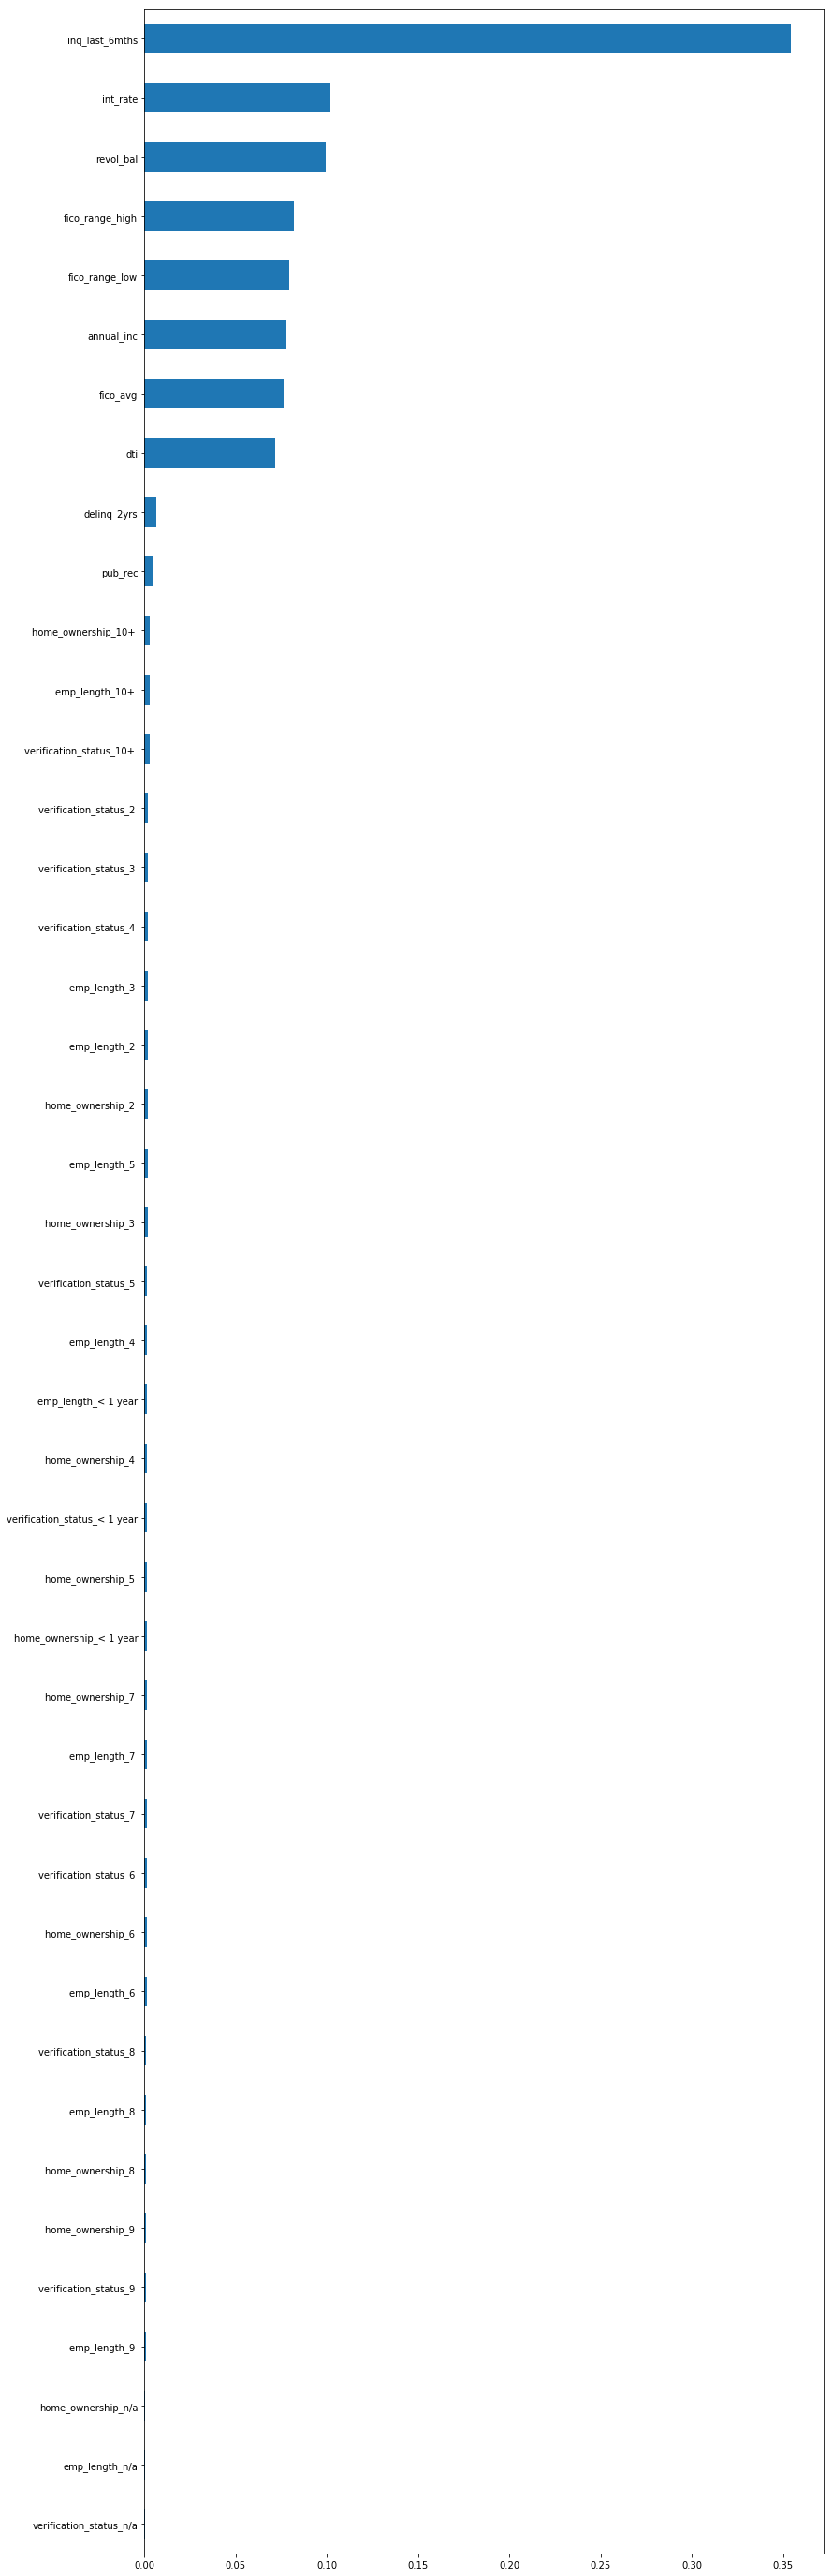

In [339]:
# same thing here but I graphed it out so it was a little easier to visualize 
pd.Series(rfreg_gmv_tuned.feature_importances_, 
          index=X.columns).sort_values().plot(kind='barh', figsize=(13,50))

In [336]:
X.columns

Index([u'fico_range_low', u'fico_range_high', u'annual_inc', u'fico_avg',
       u'int_rate', u'inq_last_6mths', u'revol_bal', u'pub_rec', u'dti',
       u'delinq_2yrs', u'emp_length_10+ ', u'emp_length_2 ', u'emp_length_3 ',
       u'emp_length_4 ', u'emp_length_5 ', u'emp_length_6 ', u'emp_length_7 ',
       u'emp_length_8 ', u'emp_length_9 ', u'emp_length_< 1 year',
       u'emp_length_n/a', u'home_ownership_10+ ', u'home_ownership_2 ',
       u'home_ownership_3 ', u'home_ownership_4 ', u'home_ownership_5 ',
       u'home_ownership_6 ', u'home_ownership_7 ', u'home_ownership_8 ',
       u'home_ownership_9 ', u'home_ownership_< 1 year', u'home_ownership_n/a',
       u'verification_status_10+ ', u'verification_status_2 ',
       u'verification_status_3 ', u'verification_status_4 ',
       u'verification_status_5 ', u'verification_status_6 ',
       u'verification_status_7 ', u'verification_status_8 ',
       u'verification_status_9 ', u'verification_status_< 1 year',
       u'verifica

In [337]:
X.head()

,fico_range_low,fico_range_high,annual_inc,fico_avg,int_rate,inq_last_6mths,revol_bal,pub_rec,dti,delinq_2yrs,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1 year,emp_length_n/a,home_ownership_10+,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,home_ownership_6,home_ownership_7,home_ownership_8,home_ownership_9,home_ownership_< 1 year,home_ownership_n/a,verification_status_10+,verification_status_2,verification_status_3,verification_status_4,verification_status_5,verification_status_6,verification_status_7,verification_status_8,verification_status_9,verification_status_< 1 year,verification_status_n/a
0,695.0,699.0,15300.0,695.0,10.99,0.0,9316.0,0.0,19.76,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,800.0,804.0,125000.0,800.0,7.51,1.0,25364.0,0.0,18.43,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,725.0,729.0,81600.0,725.0,12.53,2.0,358.0,0.0,5.12,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,700.0,704.0,80000.0,700.0,13.49,0.0,10142.0,0.0,3.27,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,690.0,694.0,30555.0,690.0,13.22,1.0,3371.0,1.0,4.32,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# now pulling in the testing dataset

In [175]:
#Load in test data when you're ready 
test = pd.read_csv("../../data/lending_club/challenge_testing_data.csv")


# formatting it in the dame way as testing

In [176]:
test["term"] = test.term.str.replace("months", "")
test["int_rate"] = test.int_rate.str.replace("%", "")
test["emp_length"] = test.emp_length.str.replace("years", "")
test["home_ownership"] = test.emp_length.str.replace("rent", "1")
test["home_ownership"] = test.emp_length.str.replace("own", "0")
test["verification_status"] = test.emp_length.str.replace("Not Verified", "0")
test["verification_status"] = test.emp_length.str.replace("Verified", "1")
test["verification_status"] = test.emp_length.str.replace("Source Verified", "1")

In [177]:
test.term = test.term.astype(float)
test["int_rate"] = test["int_rate"].astype(float)

In [178]:
test['fico_avg']= (test.fico_range_low +test.fico_range_low)/2

In [179]:
X = test[[u'fico_range_low', u'fico_range_high',
       u'annual_inc', 'fico_avg', 'int_rate'
, u'inq_last_6mths', u'revol_bal', u'pub_rec', u'dti', u'delinq_2yrs'
          ,"emp_length","home_ownership","verification_status"]]

X = X.fillna(0)
X = pd.get_dummies(X, columns=["emp_length","home_ownership","verification_status"], drop_first=True)

y = test['loan_status']

In [ ]:
X.co

In [180]:
X.head()

,fico_range_low,fico_range_high,annual_inc,fico_avg,int_rate,inq_last_6mths,revol_bal,pub_rec,dti,delinq_2yrs,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1 year,emp_length_n/a,home_ownership_10+,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,home_ownership_6,home_ownership_7,home_ownership_8,home_ownership_9,home_ownership_< 1 year,home_ownership_n/a,verification_status_10+,verification_status_2,verification_status_3,verification_status_4,verification_status_5,verification_status_6,verification_status_7,verification_status_8,verification_status_9,verification_status_< 1 year,verification_status_n/a
0,740.0,744.0,30000.0,740.0,15.27,5.0,1687.0,0.0,1.00,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,690.0,694.0,49200.0,690.0,13.49,1.0,5598.0,0.0,20.00,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,660.0,664.0,48000.0,660.0,18.64,2.0,8221.0,0.0,5.35,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,725.0,729.0,15000.0,725.0,12.69,0.0,9279.0,0.0,18.08,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,705.0,709.0,15000.0,705.0,9.91,2.0,7323.0,0.0,12.56,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# scoring the model and adding it to the dataframe

In [191]:
test['model_scored'] = pd.Series(list(rfreg_gmv_tuned.predict_proba(X)))

In [198]:
test['model_scored'] = rfreg_gmv_tuned.predict_proba(X)[:, 1]

In [184]:
test.model_scored.value_counts(normalize=True)

1    0.928117
0    0.071883
Name: model_scored, dtype: float64

In [195]:
test.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens,fico_avg,model_scored
0,1077430,2500.0,2500.0,60.0,15.27,59.83,C,Ryder,< 1 year,< 1 year,30000.0,< 1 year,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0,740.0,"[0.13346615419600172, 0.8665338458039984]"
1,1076863,10000.0,10000.0,36.0,13.49,339.31,C,AIR RESOURCES BOARD,10+,10+,49200.0,10+,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0,690.0,"[0.15253798997862258, 0.8474620100213767]"
2,1072053,3000.0,3000.0,36.0,18.64,109.43,E,MKC Accounting,9,9,48000.0,9,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5%,4.0,Dec-2014,0.0,0.0,0.0,660.0,"[0.25977633186149945, 0.7402236681385013]"
3,1071570,5375.0,5375.0,60.0,12.69,121.45,B,Starbucks,< 1 year,< 1 year,15000.0,< 1 year,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5%,3.0,Dec-2016,0.0,0.0,0.0,725.0,"[0.24483290302253333, 0.7551670969774673]"
4,1069866,3000.0,3000.0,36.0,9.91,96.68,B,Target,3,3,15000.0,3,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1%,11.0,Feb-2017,0.0,0.0,0.0,705.0,"[0.2976980358525646, 0.7023019641474353]"


# functiones below to determine the threshold for loan approval

In [186]:
def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output
def profit_function(data):
    if data.target == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.target == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

In [ ]:
#List of probabilities
probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])
#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.7)
preds
sample_df = {"loan_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}
#Put dictionary in data frame
profit_df = train[['loan_amnt','int_rate','loan_status']

Here is the threshold function. Input your probabilities for class 1 and set a probability threshold of your choice. The default threshold is 0.5. The output will be 1's and 0s, 1 values for all the values that are greater or equal to your predetermined threshold value.

In [199]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

This is the profit function. It takes in a dataframe with the loan_amnt, int_rate, target variable, and class predictions values.

- It first checks to see if a row has 0 in the outcome column and 1 in the predicted (false positive) and returns the negative value of the loan_amnt. This is how much money you lost for loans that mean that condition.

- Then it checks for true positives, meaning conditions where both the target and predicted values equal 1, then return the loan_amnt times the int_rate divided by 100. This is how much money you made from loans that meet this condition.

- Everything else gets a zero.

In [221]:
def profit_function(data):
    if data.loan_status == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.loan_status == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

Here's an example of using the threshold and profit_functions

In [279]:
df_send = test[['loan_amnt', 'int_rate', 'loan_status', 'model_scored']]

In [280]:
df_send.head()

,loan_amnt,int_rate,loan_status,model_scored
0,2500.0,15.27,0,0.866534
1,10000.0,13.49,1,0.847462
2,3000.0,18.64,1,0.740224
3,5375.0,12.69,0,0.755167
4,3000.0,9.91,1,0.702302


In [325]:
#List of probabilities
probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])

#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(test.model_scored, thres=.5)
preds

array([1, 1, 1, ..., 0, 0, 1])

In [326]:
test_df = test[['loan_amnt', 'int_rate', 'loan_status']]

#Put dictionary in data frame

profit_df = pd.DataFrame(test_df)

profit_df

,loan_amnt,int_rate,loan_status
0,2500.0,15.27,0
1,10000.0,13.49,1
2,3000.0,18.64,1
3,5375.0,12.69,0
4,3000.0,9.91,1
5,8500.0,11.71,1
6,31825.0,7.90,1
7,5000.0,8.90,1
8,10800.0,9.91,1
9,15000.0,7.90,1


In [327]:
#Add in predictions

profit_df["predicted"] = preds
profit_df

,loan_amnt,int_rate,loan_status,predicted
0,2500.0,15.27,0,1
1,10000.0,13.49,1,1
2,3000.0,18.64,1,1
3,5375.0,12.69,0,1
4,3000.0,9.91,1,1
5,8500.0,11.71,1,1
6,31825.0,7.90,1,1
7,5000.0,8.90,1,1
8,10800.0,9.91,1,1
9,15000.0,7.90,1,1


# here is how much money we make or loose on each loan depending on the predicted probability and the threshold we set

In [329]:
#Apply function onto data frame
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series.head()

0   -2500.0
1    1349.0
2     559.2
3   -5375.0
4     297.3
dtype: float64

In [330]:
#Sum up profits and losses
profit_series.sum()

-9439893.57000003

This model made $650

In [331]:
feature_range = range(80, 100, 1)

In [3]:
#feature_range = (feature_range.atype(int)) /100

# here is a for loop so we can find the profitabilty for different thresholds on top of our predicted probabilites (from the model)

In [334]:
df_send.columns

thresh = range(10)
t = .9290

for x in thresh:
    preds = threshold(df_send.model_scored, thres=t)
    profit_df["predicted"] = preds
    profit_series = profit_df.apply(profit_function, axis = 1)
    print(str(t)+":"+str(profit_series.sum()))
    t=t+.0001

0.929:601918.3675
0.9291:628469.9175
0.9292:622405.9025
0.9293:641365.3225
0.9294:676458.0825
0.9295:668315.0925
0.9296:666971.3325
0.9297:683091.6325
0.9298:681160.5325
0.9299:679302.0825


# final results is a threshold of .9298 and we will make $681,160.53 in profit!